In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Treatment Effects

The **causal** effect of a binary categorical regressor on an outcome (dependent variable) of interest is often referred to as the **treatment effect**. Some economic examples might be the impact of price-gouging regulation on online searches for hand sanitizer during a pandemic (see economic theory below), the impact of a Masters degree on lifetime earnings, or the impact of a new trariff on electric cars produced outside the US on the retail price of electric cars in the US.

One of the most important tools used to get at "causality" developed over thousands of years of human reasoning is the application of deductive reasoning by grounding empirical research (using data to generate information/knowledge) in theory...


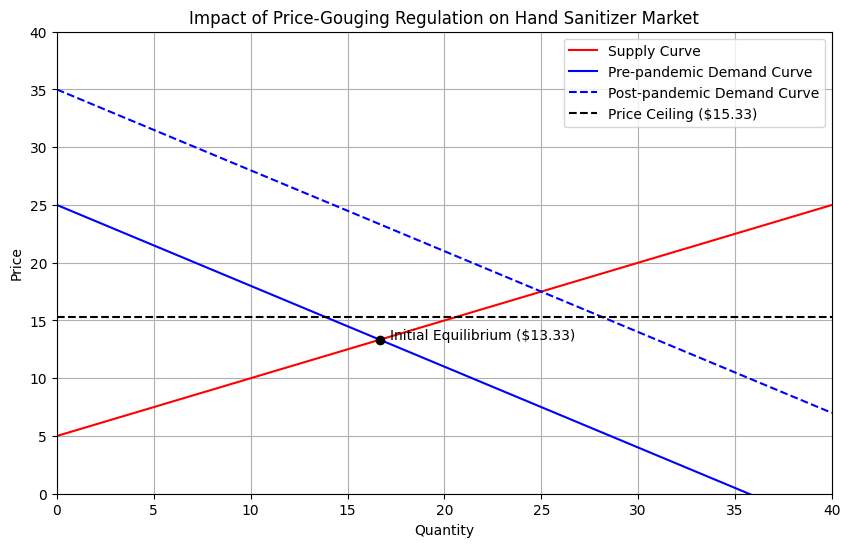

In [ ]:
# Define the supply curve (Upward sloping)
def supply_curve(quantity):
    return 0.5 * quantity + 5  # Slope of 0.5, intercept at 5

# Define the pre-pandemic demand curve (Downward sloping)
def demand_curve_pre(quantity):
    return -0.7 * quantity + 25  # Slope of -0.7, intercept at 25

# Define the post-pandemic demand curve (shifted outward)
def demand_curve_post(quantity):
    return -0.7 * quantity + 35  # Slope of -0.7, intercept shifted outward

# Set the range for quantity
quantity = np.linspace(0, 40, 500)

# Calculate the curves
supply = supply_curve(quantity)
demand_pre = demand_curve_pre(quantity)
demand_post = demand_curve_post(quantity)

# Find the initial equilibrium price and quantity
equilibrium_quantity_pre = (25 - 5) / (0.5 + 0.7)  # Set supply = demand_pre
equilibrium_price_pre = supply_curve(equilibrium_quantity_pre)

# Set the price ceiling 20% higher than initial equilibrium price
price_ceiling = equilibrium_price_pre * 1.15

# Create the plot
plt.figure(figsize=(10, 6))

# Plot supply curve
plt.plot(quantity, supply, color='red', label='Supply Curve')

# Plot pre-pandemic demand curve
plt.plot(quantity, demand_pre, color='blue', label='Pre-pandemic Demand Curve')

# Plot post-pandemic demand curve
plt.plot(quantity, demand_post, color='blue', linestyle='dashed', label='Post-pandemic Demand Curve')

# Plot price ceiling as a horizontal line
plt.axhline(y=price_ceiling, color='black', linestyle='dashed', label=f'Price Ceiling (${price_ceiling:.2f})')

# Add labels and title
plt.xlabel('Quantity')
plt.ylabel('Price')
plt.title('Impact of Price-Gouging Regulation on Hand Sanitizer Market')

# Highlight initial equilibrium point
plt.scatter(equilibrium_quantity_pre, equilibrium_price_pre, color='black', zorder=5)
plt.text(equilibrium_quantity_pre + 0.5, equilibrium_price_pre, f'Initial Equilibrium (${equilibrium_price_pre:.2f})')

# Set axis limits
plt.xlim(0, 40)
plt.ylim(0, 40)

# Show grid
plt.grid(True)

# Add legend
plt.legend()

# Show the plot
plt.show()



#Average Treatment Effects

We generally focus on average treament effects as it is difficult to measure a treatment effect at the individual level, and such a measurement would not be amenable to statistical inference, i.e., hypothesis testing, confidence intervals, etc.

##A Simple Example

Suppose we are interested in measuring the impact of a Masters degree on lifetime earnings. Let $y_{1i}$ denote the lifetime earnings of individual $i$ if they earned a Masters degree, and let $y_{0i}$ denote their lifetime earnings without earning a Masters degree. (Note that only one of these will actually be observable.) Let $T_i$ be a categorical variable that is equal to one if the individual earned a Masters degree and otherwise zero. We can write:

\begin{equation}
y_i = y_{0i} + T_i(y_{1i} - y_{0i})
\end{equation}

We can only make observations on average impacts of Masters degrees across individuals and we may seek to use those observations to estimate the **average treatment effect (ATE)**:

\begin{equation}
E(y_{1i} - y_{0i}).
\end{equation}

And the **average treatment effect on the treated (ATET)**:

\begin{equation}
E(y_{1i} - y_{0i}|T_i = 1).
\end{equation}

ATE focuses on the entire population and not just treated units. This would be the average difference in salaries if everyone in the population earned a Masters degree versus if no one in the population earned a Masters degree. ATET only looks at the difference in the subpopulation of individuals who did earn Masters degrees. These could be different in the population if there are **heterogeneous treatment effects**.

We can highlight the **counter-factual** nature of estimating treatment effects by noting that

\begin{equation}
E(y_{1i} - y_{0i}|T_i = 1) = E(y_{1i}|T_i = 1) - E(y_{0i}|T_i = 1).
\end{equation}

The first term on the right-hand side might be observable while the second term is impossible to observe. It is the counter-factual situation that answers: what would the average lifetime earnings of a Master's degree holder be if they had not earned their Master's degree? The goal is to identify a suitable control group and/or econometric strategy to address this question.

#Selection Bias

A major focus of econometrics in the context of treatment effects is the problem of selection bias: there may be factors that influence the outcome of interest that also influence the porbably of being treated or being in the **treatment group** or in the **control group**. For example, there may be factors that influence the probability someone will earn a Masters degree that are also correlated with lifetime earnings.

This omitted variable problem, that will arise if we simply compare average salaries across individuals with and without Masters degrees can be made explicit by noting

\begin{align}
E(y_{i}|T_i = 1) - E(y_{i}|T_i = 0) &= E(y_{1i}|T_i = 1) - E(y_{0i}|T_i = 0)\\
&= E(y_{1i} - y_{0i}|T_i = 1) + \left[E(y_{0i}|T_i = 1) - E(y_{0i}|T_i = 0)\right]
\end{align}

where the first term in the last line is the ATET and the second term (in brackets) is the bias resulting from the fact that earnings of individuals without Masters degrees ($E(y_{0i}|T_i = 0)$ may not be a measure of what the earnings of Masters degrees holders would have been had they not earned their degrees ($E(y_{0i}|T_i = 1)$).

Note that if expected income is independent of the receiving treatment (as opposed to being independent of the treatmebt itself) then there is no bias. Such independence might be acheived via random assignment in laboratory experiments and drug trials. However, random assignment of treeatment is not possible in many cases, e.g., it would be very difficult to randomly assign people to earn Masters degrees, or it might be unethical to apply random assignment e.g., if one was stufying the impact of drinking alcohol during pregnancy on fetal health. Selection bias is likely to appear in these cases.

##Strategies Estimating Treatment Effects with Observational Data

**Observational data** is data that was not produced via random assignment of treatment, and our goal is to estimate causal treatment effects from such data.

###Regression

First, we assume a constant effects model, i.e., that the true effect of teatment is constant or,

\begin{equation}
y_{1i} - y_{0i} = \alpha,
\end{equation}

which is not a necessary assumption to estimate treatment effects using regression but helps us understand the modeling and associated assumptions.

We assume that the only variables that are correlated with both $T_i$, the treatment status, and $y_i$, the outcome of interest are observable and are collected in $X_i$. (These are the variables that would cause omitted variable bias if they are missing from the model.)

The assumption that allows causal interpretation of treatment effects estimated using regression is

\begin{equation}
E(y_{0i}|X_i, T_i) = X_i'\beta.  
\end{equation}

This expression says that the expected outcome of an untreated individual $i$ is independent of their treatment status given $X_i$, or once we control for $X_i$, outcome of individuals in the untreated subpopulation is independent of the fact that they are in the untreated subpopulation. Since we assumed the treatment effect is constant, this also implies that the outcome of individuals in the treated subpopulation is independent of treatment status given $X_i$. This allows treated and untreated to have different outcomes as it allows them to have different values in $X_i$. For example, individuals who earn Masters degrees probably hve higher GRE scores on average than individuals who do not earn Masters degrees. High GRE scores are likely positively related to lifetime earnings. This means that expected earnings are higher in the subpopulation of individuals with Masters Degrees. The question is, after we control for GRE score, are expected incomes the same on average in each group? (Probably not but maybe we can observe all of the relevant variables.)

###Difference-in-Differences Models

The above reasoning motivates the question, which variables should included in $X_i$? Broadly speaking, we might observe variation in over time ($y_t$), across space, $y_i$, or both $y_{it}$.

Let's simulate some data for the Masters degree model to help undertand this issue further.




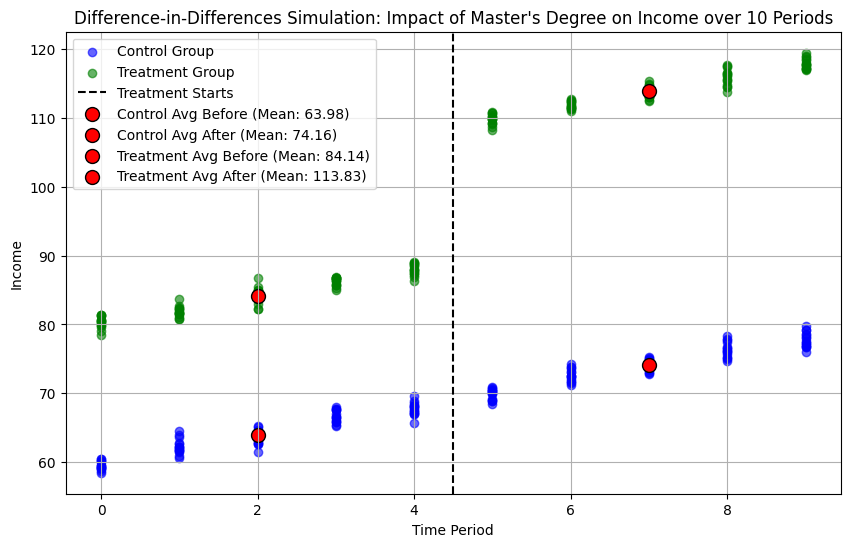

In [ ]:
# Set random seed for reproducibility
np.random.seed(16)

# Number of people in each group
n_control = 15 #don't earn Masters
n_treatment = 15 #do earn Masters

# Number of time periods (10 periods in total)
n_periods = 10
treatment_time = 5  # Master's degree earned between time periods 4 and 5

# Simulate pre-treatment intercepts for both groups
intercept_control = 60  # Control group starts lower
intercept_treatment = 80  # Treatment group starts higher

# Growth rate (same for both groups before and after treatment)
growth_rate = 2 #Income tends to grow over time

# Treatment effect (increases the intercept for the treatment group after time period 5)
treatment_effect = 20

# Time periods (from 0 to 9)
time = np.arange(n_periods)

# Generate incomes for the control group (no treatment effect, just growth)
income_control = np.array([intercept_control + growth_rate * t + np.random.normal(0, 1, n_control) for t in time])

# Generate incomes for the treatment group
income_treatment = np.array([
    intercept_treatment + growth_rate * t + np.random.normal(0, 1, n_treatment) + (t >= treatment_time) * treatment_effect
    for t in time
])

# Flatten the arrays for plotting
income_control_flat = income_control.flatten()
income_treatment_flat = income_treatment.flatten()

# Time periods for each observation (repeated for each individual)
time_control_flat = np.repeat(time, n_control)
time_treatment_flat = np.repeat(time, n_treatment)

# Plot the data
plt.figure(figsize=(10, 6))

# Scatter plot for control group
plt.scatter(time_control_flat, income_control_flat, color='blue', alpha=0.6, label='Control Group')

# Scatter plot for treatment group
plt.scatter(time_treatment_flat, income_treatment_flat, color='green', alpha=0.6, label='Treatment Group')

# Calculate the four relevant sample averages at pre- and post-treatment times
mean_control_before = np.mean(income_control[:treatment_time])
mean_control_after = np.mean(income_control[treatment_time:])
mean_treatment_before = np.mean(income_treatment[:treatment_time])
mean_treatment_after = np.mean(income_treatment[treatment_time:])

#Add line showing when Masters degree earned
plt.axvline(x=4.5, color='black', linestyle='dashed', label='Treatment Starts')

# Plot the four sample averages
plt.scatter(treatment_time - 3, mean_control_before, color='red', s=100, edgecolor='black', label=f'Control Avg Before (Mean: {mean_control_before:.2f})')
plt.scatter(treatment_time + 2, mean_control_after, color='red', s=100, edgecolor='black', label=f'Control Avg After (Mean: {mean_control_after:.2f})')
plt.scatter(treatment_time - 3, mean_treatment_before, color='red', s=100, edgecolor='black', label=f'Treatment Avg Before (Mean: {mean_treatment_before:.2f})')
plt.scatter(treatment_time + 2, mean_treatment_after, color='red', s=100, edgecolor='black', label=f'Treatment Avg After (Mean: {mean_treatment_after:.2f})')

# Add labels, title, and legend
plt.xlabel('Time Period')
plt.ylabel('Income')
plt.title('Difference-in-Differences Simulation: Impact of Master\'s Degree on Income over 10 Periods')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


The true treatment effect in our simulation is 20, or \$20k per year. Given observational data like the above, we might use a naive time-series comparison to estimate the treatment effect:

$$
\begin{equation}
\hat{TS} = \bar{y}_{1,t>t^*} - \bar{y}_{1,t<t^*} = 113.83 - 84.14 = 29.69
\end{equation}
$$

so we are just comparing the average earnings of Masters degree earners before and after they earned the degrees. This leads to an estimated treatment effect that is biased upwards because income was *already growing* before treatment.

Another naive estimate is a comparison across groups in the post-treatment period called the cross-sectional estimate:

$$
\begin{equation}
\hat{CS} = \bar{y}_{1,t>t^*} -  \bar{y}_{0,t>t^*} = 113.83 - 74.16 = 39.67
\end{equation}
$$

This estimate is biased upwards because average income in the treatment group was *already larger* than average income in the control group before the treatment group earned their Masters degrees. These are cases in which the outcome (income) is not independent of treatment status so we have selection bias/omitted variable bias.

Note that we could fix the bias in the time series estimate if we controlled for the growth rate in income over time. If we assume that the income growth rate is the same in the treatment and control groups (the **parallel trends assumption**) then we can measure the bias using the control group and subtract it from the estimator. The updated estimate is:

$$
\begin{align}
\hat{TS}^* &= \bar{y}_{1,t>t^*} - \bar{y}_{1,t<t^*} - \left[\bar{y}_{0,t>t^*} - \bar{y}_{0,t<t^*}\right]\\
&=  113.83 - 84.14 - (74.16 - 63.98) = 29.69 - 10.18 = 19.51
\end{align}
$$

We could also remove the bias from the cross-sectional estimate by subtracting the pre-existing difference in incomes between treated and control averages:

$$
\begin{align}
\hat{CS}^* &= \bar{y}_{1,t>t^*} -  \bar{y}_{0,t>t^*} - \left[\bar{y}_{1,t<t^*} -  \bar{y}_{0,t<t^*} \right]\\
&= 113.83 - 74.16 - (84.14 - 63.98) = 39.67 - 20.16 = 19.51
\end{align}
$$

Note that $\hat{TS}^* = \hat{CS}^*$, and both of these adjusted estimators provide unbiased estimators. These estimators are both simple versions of the difference-in-differences estimator, which will provide unbiased estimates of treatement effects if **the change in the outcome variable in the control group over the treatment period reflects what the change in the treatment group would have been in the absence of treatment**. The most common way to assess this assumption is via visual inspection of the pre-treatment trends. The fact that the series in our simulation exhibit parallel trends in the pre-treatment period provides evidence that the DiD estomator is useful.

The $\hat{TS}^*$ and $\hat{CS}^*$ show that the DiD estimator controls for variation in time and variation in space (between individuals) without directly observing the specific variables that influence this change. Note that panel data is required for this estimator. The DiD estimator will fix selection bias as long as treatement status is independent after controlling for time and space variation in this manner. This will be true if all such variation is (1) time-invariant within the groups, and (2) variation stemming from time impacts the groups equally. In our simulation, the average difference between treatment and control is constant (absent the treatment effect) satisfying (1), and the rate of change in incomes is equal in the two groups satidfying (2). DiD will lead to bias estimates if there are time- and space-varying vriables that impact both outcome and treatment status that are missing from the regression. For example, if all of the Masters degrees earners also participated in a job-training program, but none of the control individuals did, then that would still lead to missing variable bias. However, DiD provides an excellent starting point.

In the case that all treatment units recieve treatment at the same time, we can estimate the treatment effect using a DiD regression of the form

$$
\begin{equation}
y_{it} = \beta_0 + \beta_1TreatmentGroup_i + \beta_2PostTreatment_t\\ + \beta_{DiD}TreatmentGroup_i\times PostTreatment_t + \epsilon_{it}
\end{equation}
$$

where $TreatementGroup$ is equal to one if individual $i$ is ever treated and zero otherwise, and $PostTreatment$ is equal to one if time period $t$ is after treatment and zero otherwise. Note we can make statements like

$\beta_0 = $ the average outcome in the control group prior to treamtment but substituting ones and zeroes into the equation (in this case all variables are zero.) You can use this type of reasoning in the homework to show that $\beta_{DiD}$ gives the same estimator as the adjusted time-series and cross-sectional estimates above. The value of using regression for DiD is that we can now add control variables for factors that vary by time and space as long as we can observe them.

Note that the above regression amounts to giving each time period and individual/location it's own intercept in the regression. In the case that we have many units in the treatment and control groups, and to account for the possibility of **staggered treatment** timing (treatment units treated at different times), we can use the more general **two-way fixed effects difference-in-differences estimator** (2WFEDiD):

$$
\begin{equation}
y_{it} = \alpha_i + \gamma_t + \beta_{DiD}TreatmentActive_{it} + \sum_k\beta_kx_{k,it} + \epsilon_{it}
\end{equation}
$$

where $\beta_{DiD}$ is the population causal treatment effect of interest. $\alpha_i$ is a set of intercept terms that varies by individual/place (each individual in our Masters Degree example gets their own individual intercept regardless of whether they got a Masters degree or not - differences between all individuals including differences between Masters earners and non-earners are captured by this term), $\gamma_t$ is a set of intercept terms that varies by time period (each time period in our example would get it's own intercept whether it is before or after treatment which would control for all time variation common across individuals including time variation between pre- and post-treatment periods), $TreatmentActive_{it}$ is equal to one if individual $i$ experienced treatment before period $t$ and is otherwise equal to zero, and $\sum_k\beta_kx_{k,it}$ are time- and space-varying control variables. Note that time-invariant and/or space invariant control variables cannot be included as there would be a perfect collinearity problem.

###2WFEDiD Example

A co-investigator and I used the following 2WFEDiD regression to estimate the impact of price-gouging regulation on social contacts in retail spaces as measured by cellphone location data:

$$
\begin{equation}
y_{id} = \alpha_i + \alpha_d\\ + \beta(Law_i \times Active_{id}) + \eta(DensityQuartile_i \times Active_{id})\\
+ \sum_k\gamma_kX_{k,id} + \epsilon_{id}
\end{equation}
$$

where $\alpha_i$ and $\alpha_d$ give each county and day in the data set their own intercept term, respectively, $Law_i$ is one if county $i$ is in a state that has price-gouging regulation,  $Active_{id}$ is equal to one if the governer of a state has declared an emergency by day $d$ (this is how price-gouging regulations are activated in states that have them), $DensityQuartile_i$ is the population density quartile of county $i$ (people in counties with very high or very low population densities might react to emergency declerations associated with pandemics differently), and $\sum_k\gamma_kX_{k,id}$ is a sum of county- and time-varying control variables like number of COVID-19 cases. [Paper](https://link.springer.com/content/pdf/10.1007/s11127-023-01054-z.pdf).

